### AutoMPG 선형회귀 과제 

- 팀정보
  - 팀번호: 01팀
  - 참여팀원명: 이민하
  - 불참팀원명:


- Dataset: AutoMPG dataset
  - 정답값: mpg
  - 특징: origion을 제외한 6개의 특징들
    - ['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year']
- Train : Test = 7 : 3

(1) Data  정제: 누락된 특징은 그 특징의 평균값으로 대체하라.    
(2) 각 특징들과 mpg(정답값)사이의 상관계수를 구하고, Seaborn(SNS) 히트맵을 그려라.

(3) 상관계수가 가장 높은 순서로 특징을 $x_1, x_2, ..., x_6$이라고 할 때,
특징1개(x1)만을 사용해서 선형회귀를 한 $R^2$ score  $S_1$을 구하라.
특징2개(x1, x2)를 사용해서 선형회귀를 한 $R^2$ score   $S_2$을 구하라.
이런 식으로 특징 6개를 사용한 s6를  구하라.
가로축은 특징의 개수, 세로축은 $S_1, ..., S_6$인 그래프를 그려라.

(4) 특징을 6개 사용한 경우에 대해 Test dataset에 대해  정답값과 예측치간의 MSE를 구하기 

- $MSE = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2$

여기에서 $y_i$와 $\hat{y}_i$는 각각 정답값과 예측치를 의미함

(5) 특징을 6개 사용한 경우 $x$축은 정답값($y_i$), $y$축은 예측치($\hat{y}_i$)인 그래프를 그려라.측치( y^i )인 그래프를 그려라.

In [76]:
# 평균값으로 누락된 특징이 정제된 AutoMPG dataset
import pathlib
import matplotlib.pyplot as plt
import pandas as pd

dataset_path='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
mpg_df=pd.read_csv(dataset_path,names=column_names, na_values='?',comment='\t', sep=' ',skipinitialspace=True)

mpg_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [77]:
mpg_df.count()

MPG             398
Cylinders       398
Displacement    398
Horsepower      392
Weight          398
Acceleration    398
Model Year      398
Origin          398
dtype: int64

#### (1) Data 정제하기

In [78]:
missing_index = mpg_df['Horsepower'].isna()
print("1: Missing index")
print(missing_index[30:35])
mpg_df[missing_index]

1: Missing index
30    False
31    False
32     True
33    False
34    False
Name: Horsepower, dtype: bool


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [79]:
print("2: 평균으로 누락된 항목을 대체하기")
print("mpg_df['Horsepower'].mean() = ", mpg_df['Horsepower'].mean())
mpg_df.fillna(mpg_df['Horsepower'].mean(), inplace=True)
print(mpg_df[missing_index])
# origin을 삭제하기
mpg_df.drop('Origin', axis=1, inplace=True)

2: 평균으로 누락된 항목을 대체하기
mpg_df['Horsepower'].mean() =  104.46938775510205
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
32   25.0          4          98.0  104.469388  2046.0          19.0   
126  21.0          6         200.0  104.469388  2875.0          17.0   
330  40.9          4          85.0  104.469388  1835.0          17.3   
336  23.6          4         140.0  104.469388  2905.0          14.3   
354  34.5          4         100.0  104.469388  2320.0          15.8   
374  23.0          4         151.0  104.469388  3035.0          20.5   

     Model Year  Origin  
32           71       1  
126          74       1  
330          80       2  
336          80       1  
354          81       2  
374          82       1  


#### (2) 각 특징들과 mpg(정답값)사이의 상관계수를 구하고, Seaborn(SNS) 히트맵을 그려라.

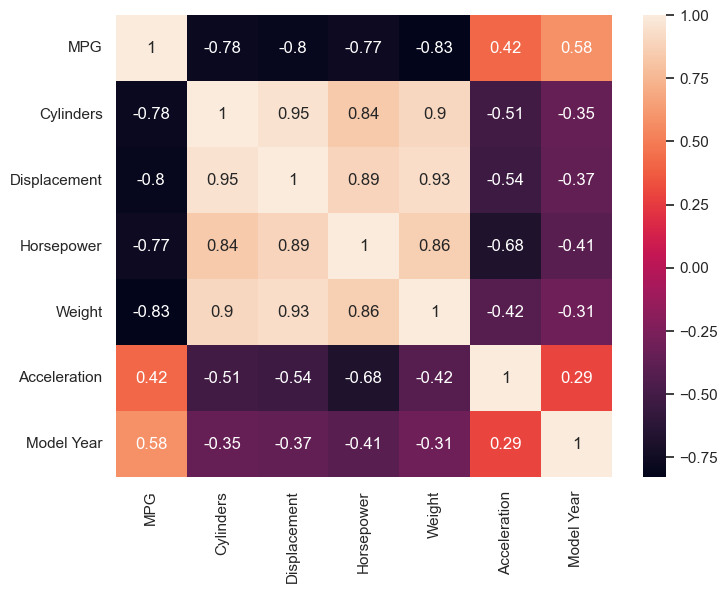

In [80]:
import seaborn as sns # 시각화: Seaborn 라이브러리

fig = plt.figure(figsize = (8, 6))
correlation = mpg_df.corr().round(2)
sns.heatmap(data = correlation, annot = True)

plt.show()

#### (3) 상관계수가 가장 높은 순서로 특징을 x1, x2, ..., x6이라고 할 때,
특징1개(x1)만을 사용해서 선형회귀를 한 R2 score  S1을 구하라.
특징2개(x1, x2)를 사용해서 선형회귀를 한 R2 score   S2을 구하라.
이런 식으로 특징 6개를 사용한 s6를  구하라.
가로축은 특징의 개수, 세로축은 S1, ..., s6인 그래프를 그려라.

Weight          0.83
Displacement    0.80
Cylinders       0.78
Horsepower      0.77
Acceleration    0.42
Model Year      0.58
Name: MPG, dtype: float64
6


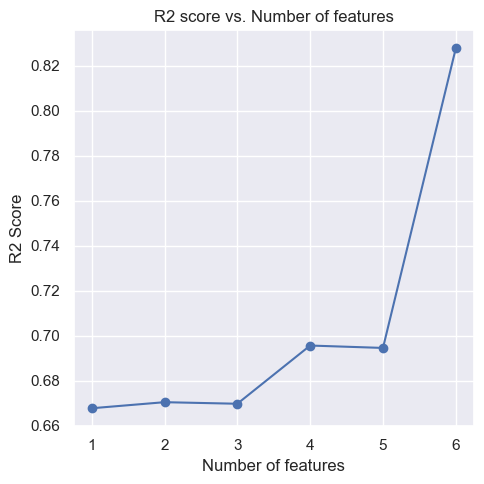

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

mpg_corr = abs(correlation["MPG"][1:].sort_values())
print(mpg_corr)
print(len(mpg_corr))

r2_list = []

for i in range(len(mpg_corr)):
    features = mpg_df[mpg_corr.index[:i + 1]]
    target = mpg_df["MPG"]
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        target, 
                                                        test_size = 0.3,
                                                        random_state = 42)
    
    linear_model = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None)

    linear_model.fit(X_train, y_train)

    result = linear_model.predict(X_test)
    
    r2_list.append(r2_score(result, y_test))

fig = plt.figure(figsize = (5, 5))
plt.plot(list(range(1, 7)), r2_list)
plt.scatter(list(range(1, 7)), r2_list)
plt.ylabel("R2 Score")
plt.xlabel("Number of features")
plt.title("R2 score vs. Number of features")
plt.tight_layout()
plt.show()

  (1) $R^2$ score를 설명하라.  (ipynb 파일내에서 text(or markdown)로 설명함)
  
  모델의 적합도를 평가하는평가지표
  R2 값이 1에 가까우면 정확하게 예측했음을 의미하고, 0에 가까우면 평균값으로 예측을 의미한다.
  R2 값이 음수이면 평균값 예측보다 못하다는 의미이다.
  즉, R2 값이 1과 가까울수록 모델의 성능이 뛰어나다.

#### (4) 특징을 6개 사용한 경우에 대해 Test dataset에 대해  정답값과 예측치간의 MSE를 구하기 
train_test_split의 random_state는 42로 하라.


In [82]:
mpg_df.columns[6]

'Model\xa0Year'

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_y_data = mpg_df['MPG']
df_x_data = mpg_df.drop('MPG',axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x_data, df_y_data, random_state = 42, train_size=0.7)

linear_reg = LinearRegression().fit(X_train, y_train)
y_test_pred = linear_reg.predict(X_test)
y_train_pred = linear_reg.predict(X_train)
print('MSE = ', mean_squared_error(y_test, y_test_pred))

MSE =  9.989386125577953


#### (5) 특징을 6개 사용한 경우 x축은 정답값, y축은 예측치인 그래프를 그려라.

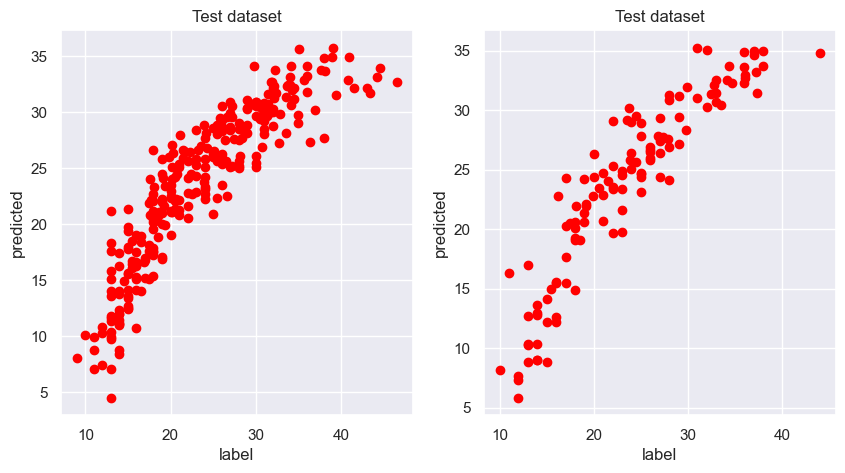

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
ax0, ax1 = fig.subplots(1, 2)

ax0.scatter(y_train, y_train_pred, color = "red")
ax0.set_title("Test dataset")
ax0.set_ylabel("predicted")
ax0.set_xlabel("label")

ax1.scatter(y_test, y_test_pred, color = "red")
ax1.set_title("Test dataset")
ax1.set_ylabel("predicted")
ax1.set_xlabel("label")
plt.show()
